**1. Importing the dataset**

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from tqdm import tqdm
from datetime import datetime, timedelta

In [ ]:
Symbol = 'goog'
GLG = yf.Ticker(Symbol)

interval = '1d'
start = '2010-1-1'
end = datetime.now().strftime('%Y-%m-%d')

GLG_history = GLG.history(period=interval, start=start, end=end)
GLG_history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00-05:00,15.576966,15.640571,15.509635,15.571998,78541293,0.0,0.0
2010-01-05 00:00:00-05:00,15.582680,15.599078,15.442550,15.503423,120638494,0.0,0.0
2010-01-06 00:00:00-05:00,15.549884,15.549884,15.065395,15.112601,159744526,0.0,0.0
2010-01-07 00:00:00-05:00,15.140925,15.155833,14.724761,14.760787,257533695,0.0,0.0
2010-01-08 00:00:00-05:00,14.708612,14.988125,14.636808,14.957565,189680313,0.0,0.0
...,...,...,...,...,...,...,...
2024-10-21 00:00:00-04:00,164.580002,166.220001,164.304993,165.800003,11384000,0.0,0.0
2024-10-22 00:00:00-04:00,164.699997,167.470001,164.669998,166.820007,11958600,0.0,0.0
2024-10-23 00:00:00-04:00,166.429993,167.600006,163.632996,164.479996,12754300,0.0,0.0


**2. Exploring the Dataset**

1. Checking Company's financial statement data in each Year

In [ ]:
def format_large_number(x):
    if isinstance(x, (int, float)):
        sign = '-' if x < 0 else ''
        x = abs(x)
        if x >= 1e12:
            return f"{sign}{x/1e12:.2f}T"
        elif x >= 1e9:
            return f"{sign}{x/1e9:.2f}B"
        elif x >= 1e6:
            return f"{sign}{x/1e6:.2f}M"
        elif x >= 1e3:
            return f"{sign}{x/1e3:.2f}K"
        else:
            return f"{sign}{x:.2f}"
    else:
        return x

In [ ]:
cmap = 'RdYlGn'
# Prefix bold for Seaborn plot text
prefix_bold = r'$\bf{'
suffix_bold = '}$'
# Prefix bold for Print text
prefix_p_bold = '\033[1m'
suffix_p_bold = '\033[0m'

In [ ]:
GLG.financials.style.format(format_large_number).background_gradient(cmap=cmap, subset=GLG.financials.columns.tolist())

,2023-12-31 00:00:00,2022-12-31 00:00:00,2021-12-31 00:00:00,2020-12-31 00:00:00,2019-12-31 00:00:00
Tax Effect Of Unusual Items,-286.48M,-981.51M,1.95B,970.57M,nan
Tax Rate For Calcs,0.14,0.16,0.16,0.16,nan
Normalized EBITDA,100.03B,91.33B,91.49B,55.94B,nan
Total Unusual Items,-2.06B,-6.17B,12.03B,5.97B,nan
Total Unusual Items Excluding Goodwill,-2.06B,-6.17B,12.03B,5.97B,nan
Net Income From Continuing Operation Net Minority Interest,73.80B,59.97B,76.03B,40.27B,nan
Reconciled Depreciation,11.95B,13.47B,12.44B,13.70B,nan
Reconciled Cost Of Revenue,133.33B,126.20B,110.94B,84.73B,nan
EBITDA,97.97B,85.16B,103.52B,61.91B,nan
EBIT,86.03B,71.69B,91.08B,48.22B,nan


2. Checking the Stock Balancesheet of Company (The .balancesheet provides a company's financial health, liquidity, and capital structure.)

In [ ]:
GLG.balancesheet.style.format(format_large_number).background_gradient(cmap=cmap, subset=GLG.balancesheet.columns.tolist())

,2023-12-31 00:00:00,2022-12-31 00:00:00,2021-12-31 00:00:00,2020-12-31 00:00:00,2019-12-31 00:00:00
Treasury Shares Number,0.00,nan,nan,nan,nan
Ordinary Shares Number,12.46B,12.85B,13.24B,13.50B,nan
Share Issued,12.46B,12.85B,13.24B,13.50B,nan
Total Debt,28.50B,29.68B,28.39B,26.77B,nan
Tangible Book Value,254.18B,227.18B,227.26B,199.92B,nan
Invested Capital,295.25B,269.00B,264.48B,235.38B,nan
Working Capital,89.72B,95.50B,123.89B,117.46B,nan
Net Tangible Assets,254.18B,227.18B,227.26B,199.92B,nan
Capital Lease Obligations,16.63B,16.82B,15.55B,13.94B,nan
Common Stock Equity,283.38B,256.14B,251.63B,222.54B,nan


3. Checking the Stock cashflow (The .cashflow gives insights into how well a company manages its cash, including where its money comes from and how it is spent)

In [ ]:
cashflow = GLG.cashflow
cashflow.style.format(format_large_number).background_gradient(cmap=cmap, subset=GLG.cashflow.columns.tolist())

,2023-12-31 00:00:00,2022-12-31 00:00:00,2021-12-31 00:00:00,2020-12-31 00:00:00,2019-12-31 00:00:00
Free Cash Flow,69.50B,60.01B,67.01B,42.84B,nan
Repurchase Of Capital Stock,-61.50B,-59.30B,-50.27B,-31.15B,nan
Repayment Of Debt,-11.55B,-54.07B,-21.43B,-2.10B,nan
Issuance Of Debt,10.79B,52.87B,20.20B,11.76B,nan
Capital Expenditure,-32.25B,-31.48B,-24.64B,-22.28B,nan
Income Tax Paid Supplemental Data,19.16B,18.89B,13.41B,4.99B,nan
End Cash Position,24.05B,21.88B,20.95B,26.46B,nan
Beginning Cash Position,21.88B,20.95B,26.46B,18.50B,nan
Effect Of Exchange Rate Changes,-421.00M,-506.00M,-287.00M,24.00M,nan
Changes In Cash,2.59B,1.44B,-5.23B,7.94B,nan


In [ ]:
df = GLG.history(period="max")

In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,5082.000000,5082.000000,5082.000000,5082.000000,5.082000e+03,5082.000000,5082.000000
mean,46.590317,47.080146,46.125219,46.609627,1.145472e+08,0.000079,0.004527
std,44.908477,45.398787,44.469432,44.935389,1.492741e+08,0.003967,0.282296
min,2.464438,2.527794,2.384187,2.484811,1.584340e+05,0.000000,0.000000
25%,13.058675,13.169860,12.901526,13.059855,2.689250e+07,0.000000,0.000000
50%,27.293105,27.485354,27.012567,27.259295,5.358400e+07,0.000000,0.000000
75%,61.443230,62.010838,61.012413,61.516672,1.406061e+08,0.000000,0.000000
max,191.497912,193.055862,190.369396,192.406723,1.650833e+09,0.200000,20.000000


In [ ]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-08-19 00:00:00-04:00,2.484562,2.585436,2.384187,2.493011,897427216,0.0,0.0
2004-08-20 00:00:00-04:00,2.509657,2.710161,2.496986,2.691030,458857488,0.0,0.0
2004-08-23 00:00:00-04:00,2.751654,2.819482,2.709416,2.718112,366857939,0.0,0.0
2004-08-24 00:00:00-04:00,2.763828,2.772772,2.573262,2.605561,306396159,0.0,0.0
2004-08-25 00:00:00-04:00,2.607797,2.683328,2.580964,2.633636,184645512,0.0,0.0


In [ ]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-21 00:00:00-04:00,164.580002,166.220001,164.304993,165.800003,11384000,0.0,0.0
2024-10-22 00:00:00-04:00,164.699997,167.470001,164.669998,166.820007,11958600,0.0,0.0
2024-10-23 00:00:00-04:00,166.429993,167.600006,163.632996,164.479996,12754300,0.0,0.0
2024-10-24 00:00:00-04:00,164.589996,165.050003,162.770004,164.529999,12764400,0.0,0.0
2024-10-25 00:00:00-04:00,165.365005,167.399994,165.229996,166.990005,14546900,0.0,0.0


In [ ]:
df3=df.reset_index()['Close']

**2. Visualizing the plot: Day vs Close Price**

In [ ]:
import matplotlib.pyplot as plt

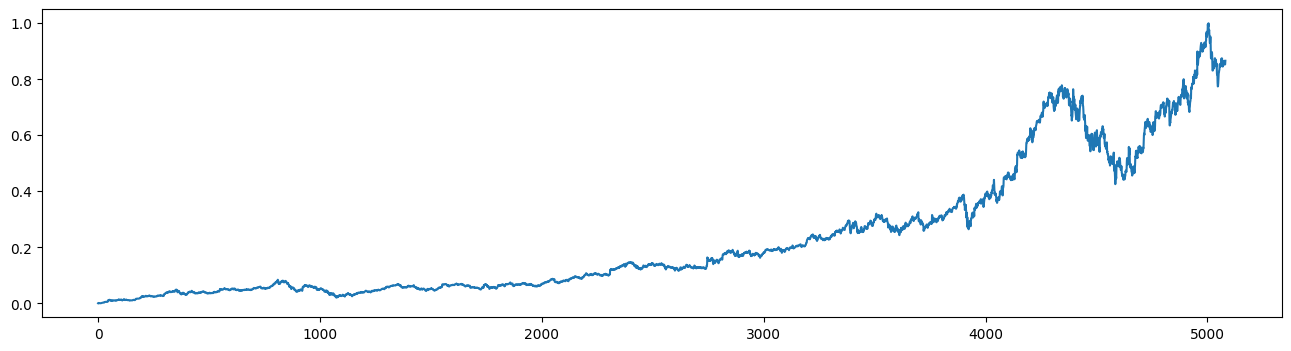

In [ ]:
plt.figure(figsize=(16, 4))  # Increase width to 12 inches
plt.plot(df3)
plt.show()

In [ ]:
df3

,Close
0,2.493011
1,2.691030
2,2.718112
3,2.605561
4,2.633636
...,...
5077,165.800003
5078,166.820007
5079,164.479996
5080,164.529999


**3. Data Pre-processing**
We must pre-process this data before applying stock price using LSTM. Transform the values in our data with help of the fit_transform function. Min-max scaler is used for scaling the data so that we can bring all the price values to a common scale. We then use 80 % data for training and the rest 20% for testing and assign them to separate variables.

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df3=scaler.fit_transform(np.array(df3).reshape(-1,1))

In [ ]:
print(df3)

[[4.31765272e-05]
 [1.08581296e-03]
 [1.22840697e-03]
 ...
 [8.52956792e-01]
 [8.53220074e-01]
 [8.66172801e-01]]


**4. Splitting dataset into Training and Testing**

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df3)*0.65)
test_size=len(df3)-training_size
train_data,test_data=df3[0:training_size,:],df3[training_size:len(df3),:1]

In [ ]:
training_size,test_size

(3303, 1779)

In [ ]:
train_data

array([[4.31765272e-05],
       [1.08581296e-03],
       [1.22840697e-03],
       ...,
       [2.34959702e-01],
       [2.36275450e-01],
       [2.38799247e-01]])

**5. Creating dataset Into Time Stamps**

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 700
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)         #no of row decreases due to smoothing

(2602, 700)
(2602,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(1078, 700)
(1078,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

**6. Implementing the Bidirectional LSTM model**

In [ ]:
### Create the Bidirectional LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Bidirectional

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(700, 1)))
model.add(Bidirectional(LSTM(50, return_sequences=True)))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_3 (Bidirectional)      │ (None, 700, 100)            │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 700, 100)            │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 100)                 │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 141,701 (553.52 KB)

 Trainable params: 141,701 (553.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 156s 4s/step - loss: 0.0029 - val_loss: 0.0032
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 192s 3s/step - loss: 3.7599e-05 - val_loss: 0.0031
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - loss: 2.0610e-05 - val_loss: 0.0039
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - loss: 2.0977e-05 - val_loss: 0.0046
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 136s 3s/step - loss: 2.0870e-05 - val_loss: 0.0030
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 135s 3s/step - loss: 1.7653e-05 - val_loss: 0.0038
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 149s 4s/step - loss: 1.8945e-05 - val_loss: 0.0034
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 218s 4s/step - loss: 1.7564e-05 - val_loss: 0.0029
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 190s 4s/step - loss: 2.1643e-05 - val_loss: 0.0029
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 210s 4s/step - loss: 1.7771e-05 - val_loss: 0.0023


**7. Prediction using testing Data**

In [ ]:
import tensorflow as tf

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

82/82 ━━━━━━━━━━━━━━━━━━━━ 42s 496ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 17s 488ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate MSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

24.079144809061678

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

118.02237282711525

**8. Plotting The Values**

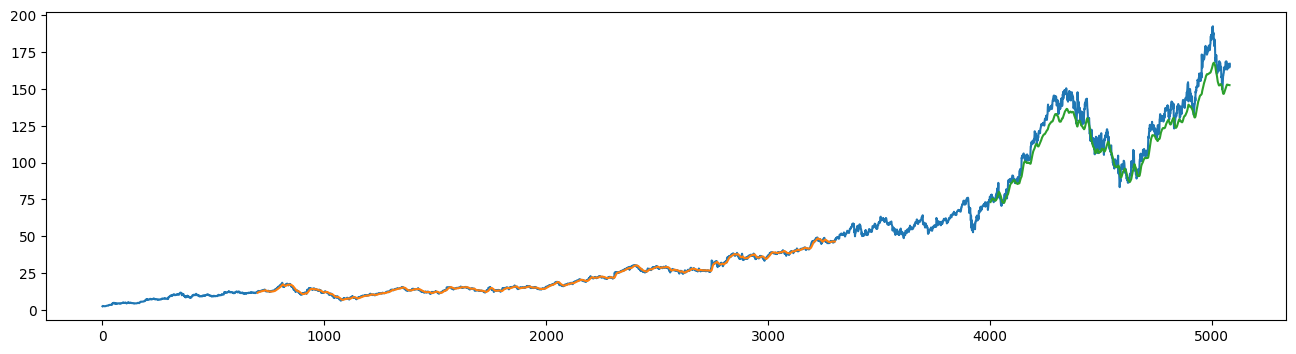

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=700
trainPredictPlot = numpy.empty_like(df3)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df3)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df3)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(16, 4))
plt.plot(scaler.inverse_transform(df3))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

**9. Predictions for next 10 days**

In [ ]:
x_input=test_data[1079:].reshape(1,-1)
x_input.shape

(1, 700)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=700
i=0
while(i<10):

    if(len(temp_input)>700):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.7893869]
701
1 day input [0.72113454 0.70277203 0.6994183  0.68814931 0.67021487 0.67168554
 0.65258509 0.66573979 0.66511473 0.68700949 0.69966262 0.71111286
 0.76446699 0.73617745 0.73809716 0.71667786 0.71812218 0.72988769
 0.71491563 0.69142415 0.69756946 0.70348114 0.70905923 0.68185689
 0.67218711 0.66659327 0.65704706 0.68377394 0.69346999 0.69542126
 0.6916238  0.69468846 0.69235909 0.68087727 0.65116174 0.65543716
 0.69003752 0.68381869 0.67222913 0.65261397 0.66794849 0.68911575
 0.69389532 0.70545603 0.70375952 0.72371337 0.71439558 0.72914701
 0.73024746 0.73249809 0.73932624 0.73614588 0.72041491 0.72593259
 0.74138782 0.72783928 0.70742298 0.70368858 0.69079643 0.66866273
 0.66119386 0.67123377 0.65530323 0.65902196 0.6725207  0.66051629
 0.64314128 0.61517998 0.63427778 0.61461272 0.59105298 0.61411637
 0.59076934 0.60227473 0.60738279 0.63073239 0.60011862 0.5944119
 0.58088163 0.58876294 0.58548803 0.58128612 0.59890537 0.58985544
 0.5998823  0.57729426 0.56859884 0

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

In [ ]:
len(df3)

5082

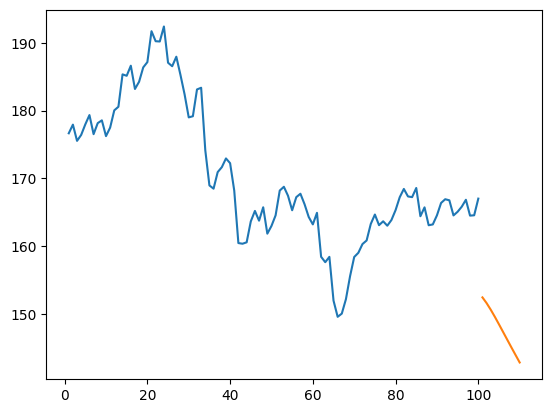

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df3[4982:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))